In [14]:
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LogisticRegression
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Question 3

In [17]:
df = pd.read_csv('diabetes.csv')
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [13]:
lr = LogisticRegression()
X = df.iloc[ : , :8 ]
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
lr.fit(X_train,y_train)

c:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
val_X = df.iloc[:77,:8]
val_y = df.iloc[:77, 8]
results = cross_validate(estimator=lr, X=val_X, y=val_y, cv = 5)

In [23]:
print(results)

{'fit_time': array([0.04272008, 0.04352045, 0.03919291, 0.03083777, 0.03041625]), 'score_time': array([0.00365543, 0.00300813, 0.00357032, 0.00200105, 0.00500083]), 'test_score': array([0.625 , 0.4375, 0.6   , 0.6   , 0.6   ])}


# Question 2

49.249224165828245
47.983215832192684
46.7499672978913


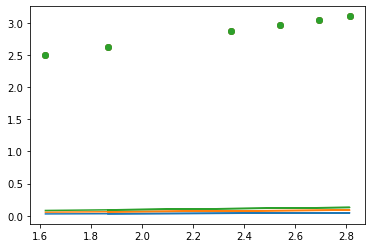

In [43]:
import random
X = [random.uniform(1,3) for i in range(6)] 
y = [1.7+0.5*x for x in X]

X = np.asarray(X)
m = 0
c = 0
l = 0.001

n = float(len(X))
iterations = 3

for i in range(iterations):
    y_pred = m*X + c
    cost = sum((y-y_pred)**2)
    print(cost)
    D_m = -(2/n) * (sum((y - y_pred) * X))
    D_c = -(2/n) * (sum(y - y_pred))
    m = m - l*D_m
    c = c - l*D_c
    y_pred = m*X + c
    plt.scatter(X,y)
    plt.plot(X,y_pred)


# Question 1

[1.02824561 1.51578947 1.81736842 1.93298246 1.51578947 1.68982456]
0.702719298245614


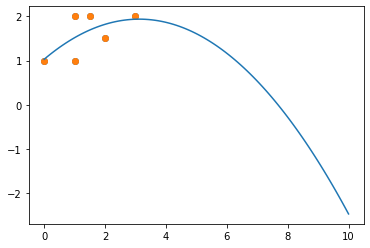

In [45]:
X = np.array([0,1,2,3,1,1.5])
Y = np.array([1,2,1.5,2,1,2])

plt.scatter(X,Y)

coeff = np.polyfit(X,Y,2)

alpha2 = coeff[0]
alpha1 = coeff[1]
alpha0 = coeff[2]

x = np.linspace(0,10,100)
plt.scatter(X,Y)
plt.plot(x,np.power(x,2)*alpha2+x*alpha1+alpha0)

Y_pred = np.power(X,2)*alpha2 + X*alpha1 + alpha0
print(Y_pred)

sum_square_error = 0

for i in range(len(Y)):
  sum_square_error += (Y[i]-Y_pred[i])**2

print(sum_square_error)